In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(500)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
  
Corpus = pd.read_csv("books_data_50.csv")
print(Corpus)

     Unnamed: 0 Author                                               Text
0             0      a  soul. Or, if you shall so prefer to choose, a ...
1             1      a  the house a man who will present himself in my...
2             2      a  themselves and of each other, and what does no...
3             3      a  so vast a majority of my fellows, that I chose...
4             4      a  and at that Mr. Hyde broke out of all bounds a...
..          ...    ...                                                ...
995         995      e  group of states whose legislatures had thus fa...
996         996      e  1910, when Mrs. Russell Sage sent to the Natio...
997         997      e  regularly feed Chickadees in winter, perched o...
998         998      e  in identifying wild birds: "Handbook of Birds ...
999         999      e  simple constitution is suggested: Article 1. T...

[1000 rows x 3 columns]


In [ ]:
Corpus=Corpus.drop(columns=['Unnamed: 0'])

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
Corpus.head(5)

,Author,Text
0,a,"soul. Or, if you shall so prefer to choose, a ..."
1,a,the house a man who will present himself in my...
2,a,"themselves and of each other, and what does no..."
3,a,"so vast a majority of my fellows, that I chose..."
4,a,and at that Mr. Hyde broke out of all bounds a...


In [ ]:
from google.colab import data_table
data_table.DataTable(Corpus, include_index=False, num_rows_per_page=1)

,Author,Text
0,a,"soul. Or, if you shall so prefer to choose, a ..."
1,a,the house a man who will present himself in my...
2,a,"themselves and of each other, and what does no..."
3,a,"so vast a majority of my fellows, that I chose..."
4,a,and at that Mr. Hyde broke out of all bounds a...
...,...,...
995,e,group of states whose legislatures had thus fa...
996,e,"1910, when Mrs. Russell Sage sent to the Natio..."
997,e,"regularly feed Chickadees in winter, perched o..."
998,e,"in identifying wild birds: ""Handbook of Birds ..."


In [ ]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
y = Corpus['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
# Importing necessary libraries
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not in stopwords.words('english')]

In [ ]:
X = Corpus['Text']

In [ ]:
print(X)

0      soul. Or, if you shall so prefer to choose, a ...
1      the house a man who will present himself in my...
2      themselves and of each other, and what does no...
3      so vast a majority of my fellows, that I chose...
4      and at that Mr. Hyde broke out of all bounds a...
                             ...                        
995    group of states whose legislatures had thus fa...
996    1910, when Mrs. Russell Sage sent to the Natio...
997    regularly feed Chickadees in winter, perched o...
998    in identifying wild birds: "Handbook of Birds ...
999    simple constitution is suggested: Article 1. T...
Name: Text, Length: 1000, dtype: object


soul. Or, if you shall so prefer to choose, a new province of knowledge and new avenues to fame and power shall be laid open to you, here, in this room, upon the instant; and your sight shall be blasted by a prodigy to stagger the unbelief of Satan.” “Sir,”
a


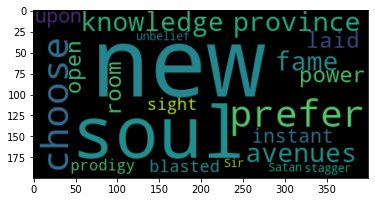

the house a man who will present himself in my name, and to place in his hands the drawer that you will have brought with you from my cabinet. Then you will have played your part and earned my gratitude completely. Five minutes afterwards, if you insist upon an explanation,
a


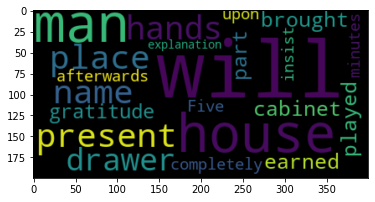

so vast a majority of my fellows, that I chose the better part and was found wanting in the strength to keep to it. Yes, I preferred the elderly and discontented doctor, surrounded by friends and cherishing honest hopes; and bade a resolute farewell to the liberty, the comparative youth,
a


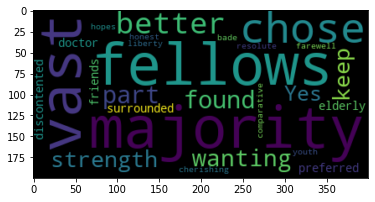

In [ ]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X = Corpus['Text']
wordcloud1 = WordCloud().generate(X[0])
wordcloud2 = WordCloud().generate(X[1]) 
wordcloud3 = WordCloud().generate(X[3]) 
print(X[0])
print(Corpus['Author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print(X[1])
print(Corpus['Author'][1])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print(X[3])
print(Corpus['Author'][3])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()

In [ ]:
# Importing necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# 80-20 splitting the dataset (80%->Training and 20%->Validation)
X_train, X_test, y_train, y_test = train_test_split(X, y
                                  ,test_size=0.2, random_state=1234)
# defining the bag-of-words transformer on the text-processed corpus
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)
# transforming into Bag-of-Words
text_bow_train=bow_transformer.transform(X_train)
text_bow_test=bow_transformer.transform(X_test)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# fit the training dataset on the classifier
KNN = KNeighborsClassifier(n_neighbors = 14)
KNN.fit(text_bow_train,y_train)
# predict the labels on validation dataset
predictions_KNN = KNN.predict(text_bow_test)
# Use accuracy_score function to get the accuracy
print("KNN Accuracy Score:",accuracy_score(predictions_KNN, y_test)*100)

KNN Accuracy Score: 50.0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_KNN))

              precision    recall  f1-score   support

           0       0.80      0.31      0.44        39
           1       0.35      0.89      0.50        44
           2       0.63      0.66      0.64        41
           3       0.62      0.37      0.46        35
           4       1.00      0.22      0.36        41

    accuracy                           0.50       200
   macro avg       0.68      0.49      0.48       200
weighted avg       0.67      0.50      0.48       200



Normalized confusion matrix
[[0.30769231 0.53846154 0.07692308 0.07692308 0.        ]
 [0.02272727 0.88636364 0.06818182 0.02272727 0.        ]
 [0.04878049 0.24390244 0.65853659 0.04878049 0.        ]
 [0.         0.48571429 0.14285714 0.37142857 0.        ]
 [0.         0.6097561  0.12195122 0.04878049 0.2195122 ]]


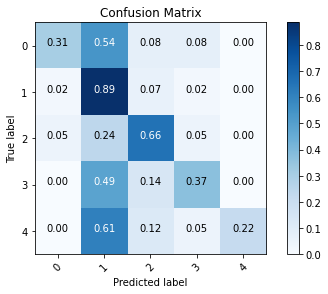

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Defining a module for Confusion Matrix...
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0])
                                  , range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test,predictions_KNN)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1,2,3,4], normalize=True,
                      title='Confusion Matrix')

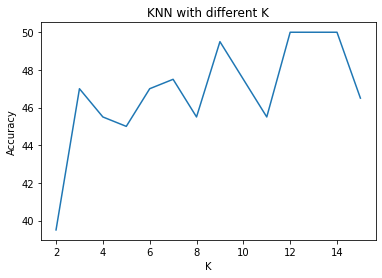

In [ ]:
x=[]
y=[]
for i in np.arange(2,16,1):
  x.append(i)
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(text_bow_train,y_train)
  # predict the labels on validation dataset
  predictions_KNN = KNN.predict(text_bow_test)
  # Use accuracy_score function to get the accuracy
  y.append(accuracy_score(predictions_KNN, y_test)*100)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN with different K") 
plt.show()

In [ ]:
y

[39.5,
 47.0,
 45.5,
 45.0,
 47.0,
 47.5,
 45.5,
 49.5,
 47.5,
 45.5,
 50.0,
 50.0,
 50.0,
 46.5]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=123)
KNN = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(KNN,text_bow_train,y_train,cv=kf)

In [ ]:
cv_scores

array([0.3625, 0.4   , 0.4375, 0.375 , 0.475 , 0.375 , 0.3875, 0.4   ,
       0.425 , 0.5   ])

In [ ]:
cv_scores.mean()

0.41375